In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [4]:
company=pd.read_csv('Company_Data.csv')

In [5]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [6]:
company.shape

(400, 11)

In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
company['ShelveLoc'] = company['ShelveLoc'].astype('category')
company['Urban'] = company['Urban'].astype('category')
company['US'] = company['US'].astype('category')

In [9]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [10]:
sales_mean = company.Sales.mean()
sales_mean

7.496325

In [11]:
company['High'] = company.Sales.map(lambda x: 1 if x > 7.49 else 0)  

In [12]:
company.High

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [13]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [14]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

In [15]:
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])

In [16]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [17]:
x=company.iloc[:,1:11]
y=company.iloc[:,11]

In [18]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [19]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: High, dtype: int64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [31]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, class_weight = 'balanced')   #model building by C5.0
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

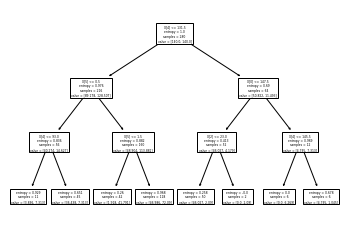

In [32]:
tree.plot_tree(model);

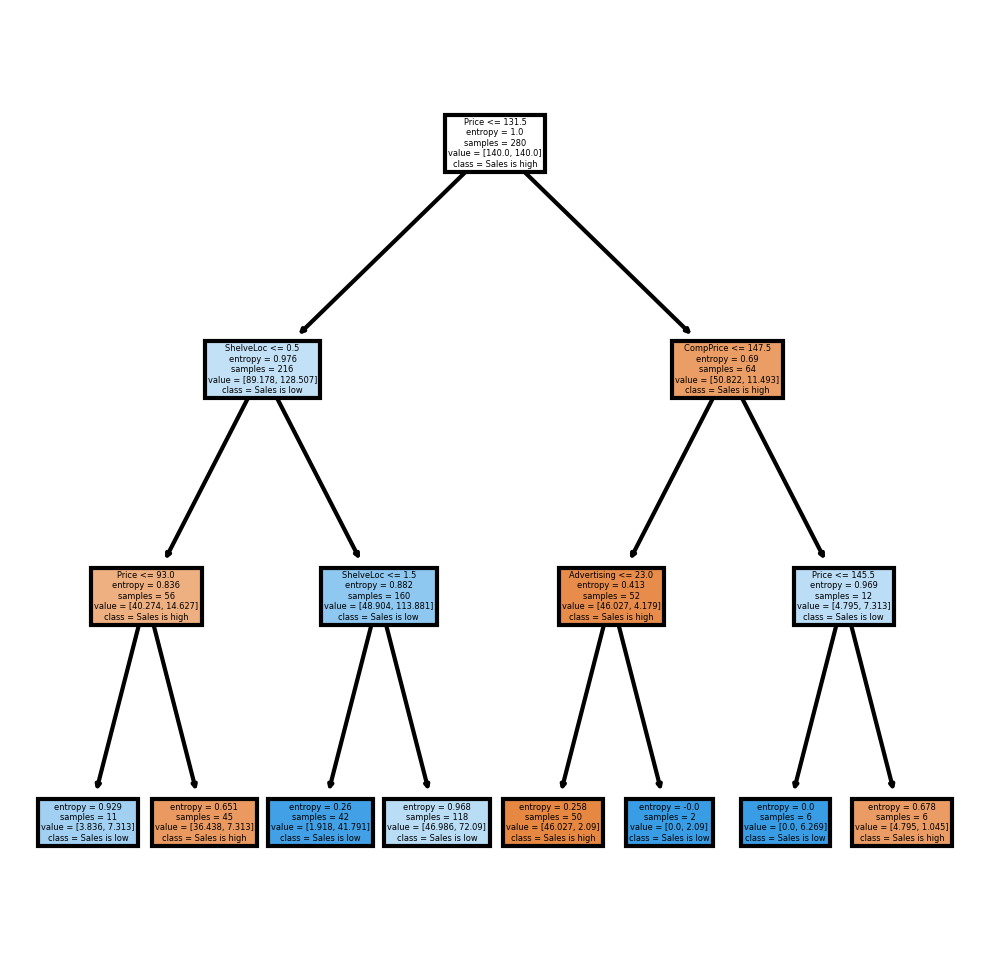

In [33]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']  #we will extract the features
cn = ['Sales is high', 'Sales is low']
fig,axes = plt.subplots(nrows = 1, ncols =1, figsize =(4,4), dpi = 300)   
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);

In [34]:
pred= model.predict(x_test)

In [35]:
pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
crosstable = pd.crosstab(y_test,pred)
crosstable

col_0,0,1
High,,
0,28,27
1,11,54


In [37]:
np.mean(pred==y_test)

0.6833333333333333

In [38]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.51      0.72      0.60        39
           1       0.83      0.67      0.74        81

    accuracy                           0.68       120
   macro avg       0.67      0.69      0.67       120
weighted avg       0.73      0.68      0.69       120



In [40]:
model_1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, class_weight = 'balanced')   #model building by CART
model_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

[Text(167.4, 190.26, 'X[4] <= 105.5\ngini = 0.5\nsamples = 280\nvalue = [140.0, 140.0]'),
 Text(83.7, 135.9, 'X[6] <= 64.0\ngini = 0.395\nsamples = 97\nvalue = [26.849, 72.09]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 118.5\ngini = 0.29\nsamples = 69\nvalue = [12.466, 58.507]'),
 Text(20.925, 27.180000000000007, 'gini = 0.419\nsamples = 41\nvalue = [12.466, 29.254]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = -0.0\nsamples = 28\nvalue = [0.0, 29.254]'),
 Text(125.55000000000001, 81.53999999999999, 'X[4] <= 80.0\ngini = 0.5\nsamples = 28\nvalue = [14.384, 13.582]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 5\nvalue = [0.0, 5.224]'),
 Text(146.475, 27.180000000000007, 'gini = 0.465\nsamples = 23\nvalue = [14.384, 8.358]'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.5\ngini = 0.469\nsamples = 183\nvalue = [113.151, 67.91]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 21.5\ngini = 0.164\nsamples = 48\nvalue = [42.192, 4.179]'),
 Text(188.32500000000002, 27.18

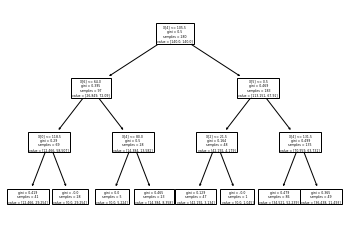

In [41]:
tree.plot_tree(model_1)

In [44]:
pred1 = model_1.predict(x_test)
pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [45]:
np.mean(pred1 == y_test)

0.6916666666666667

In [46]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       0.58      0.70      0.63        46
           1       0.78      0.69      0.73        74

    accuracy                           0.69       120
   macro avg       0.68      0.69      0.68       120
weighted avg       0.71      0.69      0.70       120



In [ ]:
+